In [41]:
#Referencia : Codigo brindado en clase
#Integrantes : Bryann Alfaro, Raul Jimenez, Donaldo Garcia

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from art.estimators.classification import KerasClassifier #No soporta TF 2
from art.utils import load_dataset

import os
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
tf.compat.v1.disable_eager_execution()

In [43]:
#Load the model 
model1 = tf.keras.models.load_model('modelo_lab')

2023-05-23 23:13:04.079089: W tensorflow/c/c_api.cc:300] Operation '{name:'AssignVariableOp_52' id:714 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node AssignVariableOp_52}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false, _device="/device:CPU:0"](kernel_7, Identity_52)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [44]:
# crea un dataframe a partir de las carpetas dentro de "malimg_dataset" y sus archivos .bytes
df = pd.DataFrame(columns=['Family', 'Image'])
fam_cat = {}
for i, family in enumerate(os.listdir('malimg_dataset')):
    fam_cat[i] = family
    for image in os.listdir(f'malimg_dataset/{family}'):
        imagen = Image.open(f'malimg_dataset/{family}/{image}')
        imagen = imagen.resize((64,64))
        new_data = {'Family': [family], 'Name': [image], 'Family_cat': [i], 'Image': [np.array(imagen).tolist()]}
        new_df = pd.DataFrame(new_data)
        df = pd.concat([df, new_df], ignore_index=True)
# muestra las primeras 5 filas del dataframe
df.head()

,Family,Image,Name,Family_cat
0,Swizzor.gen!I,"[[96, 88, 90, 92, 98, 94, 99, 92, 98, 113, 104...",08a62d426b935575116ebb121d0e317a.png,0.0
1,Swizzor.gen!I,"[[104, 104, 92, 95, 89, 85, 88, 99, 89, 100, 9...",070bedcb9eab0c49867fcb70a4d1ddbf.png,0.0
2,Swizzor.gen!I,"[[104, 86, 84, 89, 103, 94, 118, 110, 109, 105...",0757a054287b442f97ea305706d9e07d.png,0.0
3,Swizzor.gen!I,"[[107, 101, 97, 93, 99, 92, 92, 83, 90, 91, 80...",03e44bfcc48724222558c4c09c8a025f.png,0.0
4,Swizzor.gen!I,"[[92, 92, 77, 63, 76, 76, 79, 88, 94, 100, 89,...",04280e457fadccc4a239f2d3208f8609.png,0.0


In [45]:
# removemos las familias con menos de 150 muestras del dataset
df = df[df['Family'].isin(df['Family'].value_counts()[df['Family'].value_counts() > 150].index)]
df.value_counts('Family')

Family
Allaple.A         2949
Allaple.L         1591
Yuner.A            800
Instantaccess      431
VB.AT              408
Fakerean           381
Lolyda.AA1         213
C2LOP.gen!g        200
Alueron.gen!J      198
Lolyda.AA2         184
Dialplatform.B     177
Dontovo.A          162
Lolyda.AT          159
Rbot!gen           158
Name: count, dtype: int64

In [46]:
# use on the the last 20% of the dataset
df = df.iloc[int(len(df)*0.8):]

In [47]:
#Dividir el dataset
from sklearn.model_selection import train_test_split
X = df['Image'].values
y = df['Family_cat'].values
#convert X to numpy array and inside with simple list
X = np.array([np.array(xi) for xi in X])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Normalizar los datos
X_train

array([[[ 62,  39,  38, ...,  20,   8,   5],
        [102, 113, 119, ...,  75,  85, 100],
        [158, 149, 168, ..., 149, 125, 107],
        ...,
        [109, 121, 170, ..., 139, 132, 150],
        [117, 130, 154, ..., 133, 168, 140],
        [147, 154, 121, ..., 135,  89, 114]],

       [[ 49,  41,  39, ...,  22,   8,   4],
        [ 96, 110,  63, ..., 105, 129,  99],
        [106, 107,  56, ..., 126, 164, 113],
        ...,
        [ 97, 129, 142, ..., 117, 128, 112],
        [157, 142, 120, ..., 155, 149, 151],
        [111, 116, 135, ..., 103, 118, 130]],

       [[ 28,  28,  33, ...,  19,   8,   6],
        [ 96, 118, 153, ..., 111,  91, 122],
        [148, 134, 121, ..., 148, 113, 162],
        ...,
        [140, 123, 106, ..., 125, 110, 126],
        [111, 110,  85, ..., 126, 141, 123],
        [ 91, 117, 125, ..., 107, 130, 150]],

       ...,

       [[ 51,  36,  25, ...,  19,   9,   3],
        [ 82, 121, 109, ...,  96, 104, 103],
        [141, 145, 163, ..., 150, 122, 126

In [48]:
#Normalizar los datos
X_train = X_train/255
X_test = X_test/255

0.7215686274509804

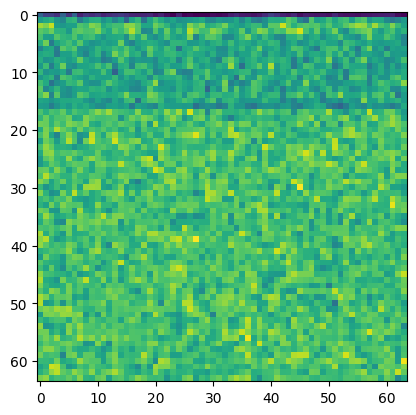

In [49]:
#Mostrar una imagen
plt.imshow(X_train[0])
#mostrar la normalizacion
X_train[0].max()

In [50]:
print(X_train.shape, X_test.shape)

(1282, 64, 64) (321, 64, 64)


In [51]:
X_train = X_train.reshape(1282, 64, 64, 1)
X_test = X_test.reshape(321, 64, 64, 1)

In [52]:
from tensorflow.keras.utils import to_categorical
categorical_y_entrenamiento = to_categorical(y_train, 25)
categorical_y_test = to_categorical(y_test, 25)

# Ataque de extraccion

In [53]:
clasificador = KerasClassifier(
    model=model1,
    clip_values=(0.0, 1.0))

In [54]:
from art.attacks.extraction import CopycatCNN
# Creating the "neural net thief" object
# that will steal the original classifier
copycat_cnn = CopycatCNN(
    batch_size_fit=256,
    batch_size_query=256,
    nb_epochs=20,
    nb_stolen=20000,
    classifier=clasificador
    )

/Users/sebastiangarcia/Documents/GitHub/Lab8-SecDS/venv/lib/python3.10/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
modelo_stole = Sequential()
modelo_stole.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (64, 64, 1), activation = 'relu'))
modelo_stole.add(MaxPool2D(pool_size = (2, 2)))
modelo_stole.add(Flatten())
modelo_stole.add(Dense(128, activation = 'relu'))
modelo_stole.add(Dense(25, activation = 'softmax'))
modelo_stole.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

model_stolen = KerasClassifier(
    model=modelo_stole, 
    clip_values=(0.0,1.0)
    )

In [56]:
# Extracting a thieved classifier
# by training the reference model
stolen_classifier = copycat_cnn.extract(
    x=X_train, 
    y=y_train, 
    thieved_classifier=model_stolen
    )

This attack does not use the provided label y.
The size of the source input is smaller than the expected number of queries submitted to the victim classifier.
/Users/sebastiangarcia/Documents/GitHub/Lab8-SecDS/venv/lib/python3.10/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-23 23:13:33.727654: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_1_2/Softmax' id:753 op device:{requested: '', assigned: ''} def:{{{node dense_1_2/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_1_2/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-23 23:13:33.772754: W tensorflow/c/c_api.cc:300] Opera

Train on 1282 samples
Epoch 1/20


2023-05-23 23:13:34.127467: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_3/mul' id:1068 op device:{requested: '', assigned: ''} def:{{{node loss_3/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_3/mul/x, loss_3/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-23 23:13:34.165029: W tensorflow/c/c_api.cc:300] Operation '{name:'training/RMSprop/dense_1_3/kernel/rms/Assign' id:1258 op device:{requested: '', assigned: ''} def:{{{node training/RMSprop/dense_1_3/kernel/rms/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/RMSprop/dense_1_3/kernel/rms, training/RMSprop/dense_1_3/kernel/rms/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and wil

1282/1282 [==============================] - 1s 400us/sample - loss: 2.0542 - accuracy: 0.5265
Epoch 2/20
1282/1282 [==============================] - 0s 277us/sample - loss: 0.4636 - accuracy: 0.8900
Epoch 3/20
1282/1282 [==============================] - 0s 299us/sample - loss: 0.2676 - accuracy: 0.9204
Epoch 4/20
1282/1282 [==============================] - 0s 350us/sample - loss: 0.1694 - accuracy: 0.9493
Epoch 5/20
1282/1282 [==============================] - 0s 321us/sample - loss: 0.1479 - accuracy: 0.9423
Epoch 6/20
1282/1282 [==============================] - 0s 290us/sample - loss: 0.1464 - accuracy: 0.9454
Epoch 7/20
1282/1282 [==============================] - 0s 366us/sample - loss: 0.1334 - accuracy: 0.9563
Epoch 8/20
1282/1282 [==============================] - 0s 332us/sample - loss: 0.1199 - accuracy: 0.9509
Epoch 9/20
1282/1282 [==============================] - 0s 319us/sample - loss: 0.1245 - accuracy: 0.9501
Epoch 10/20
1282/1282 [==============================] - 

In [57]:
# Testing the performance of the original classifier
score_original = clasificador._model.evaluate(
    x=X_test, 
    y=categorical_y_test
    )

# Testing the performance of the stolen classifier
score_stolen = stolen_classifier._model.evaluate(
    x=X_test, 
    y=categorical_y_test
    )

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} " 
      f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " 
      f"vs stolen test accuracy: {score_stolen[1]:.2f}")

Original test loss: 2.66 vs stolen test loss: 1.34
Original test accuracy: 0.89 vs stolen test accuracy: 0.89


/Users/sebastiangarcia/Documents/GitHub/Lab8-SecDS/venv/lib/python3.10/site-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2023-05-23 23:13:42.389690: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_2/mul' id:829 op device:{requested: '', assigned: ''} def:{{{node loss_2/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_2/mul/x, loss_2/dense_1_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-23 23:13:42.480851: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_3/mul' id:1068 op device:{requested: '', assigned: ''} def:{{{node loss_3/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true]

# Defensa de extraccion

In [64]:
from art.defences.postprocessor import ReverseSigmoid
post_processor = ReverseSigmoid(
  beta=1.0,
  gamma=0.2
)

classifier_def = KerasClassifier(
  model=model1,
  postprocessing_defences=post_processor,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
modelo_stole = Sequential()
modelo_stole.add(Conv2D(filters = 32, kernel_size = (4, 4), input_shape = (64, 64, 1), activation = 'relu'))
modelo_stole.add(MaxPool2D(pool_size = (2, 2)))
modelo_stole.add(Flatten())
modelo_stole.add(Dense(128, activation = 'relu'))
modelo_stole.add(Dense(25, activation = 'softmax'))
modelo_stole.compile(loss = 'categorical_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

model_stolen = KerasClassifier(
    model=modelo_stole, 
    clip_values=(0.0,1.0)
    )

copycat_cnn_def = CopycatCNN(
    batch_size_fit=256,
    batch_size_query=256,
    nb_epochs=20,
    nb_stolen=20000,
    classifier=clasificador
)

stolen_classifier_def = copycat_cnn_def.extract(
  x=X_train, 
  y=y_train, 
  thieved_classifier=model_stolen
)
score_original = classifier_def._model.evaluate(
  x=X_test,
  y=categorical_y_test
)

score_stolen = stolen_classifier_def._model.evaluate(
  x=X_test,
  y=categorical_y_test
)

# Comparing test losses
print(f"Original test loss: {score_original[0]:.2f} " 
      f"vs stolen test loss: {score_stolen[0]:.2f}")

# Comparing test accuracies
print(f"Original test accuracy: {score_original[1]:.2f} " 
      f"vs stolen test accuracy: {score_stolen[1]:.2f}")

This attack does not use the provided label y.
The size of the source input is smaller than the expected number of queries submitted to the victim classifier.
2023-05-23 23:26:00.991116: W tensorflow/c/c_api.cc:300] Operation '{name:'total_16/Assign' id:4196 op device:{requested: '', assigned: ''} def:{{{node total_16/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](total_16, total_16/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Train on 1282 samples
Epoch 1/20


2023-05-23 23:26:01.327075: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_10/mul' id:4267 op device:{requested: '', assigned: ''} def:{{{node loss_10/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_10/mul/x, loss_10/dense_15_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
2023-05-23 23:26:01.401670: W tensorflow/c/c_api.cc:300] Operation '{name:'training_8/RMSprop/iter/Assign' id:4407 op device:{requested: '', assigned: ''} def:{{{node training_8/RMSprop/iter/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_INT64, validate_shape=false](training_8/RMSprop/iter, training_8/RMSprop/iter/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modi

1282/1282 [==============================] - 1s 394us/sample - loss: 1.5036 - accuracy: 0.6997
Epoch 2/20
1282/1282 [==============================] - 0s 300us/sample - loss: 0.4983 - accuracy: 0.9017
Epoch 3/20
1282/1282 [==============================] - 0s 297us/sample - loss: 0.2310 - accuracy: 0.9384
Epoch 4/20
1282/1282 [==============================] - 0s 313us/sample - loss: 0.1884 - accuracy: 0.9431
Epoch 5/20
1282/1282 [==============================] - 0s 286us/sample - loss: 0.1828 - accuracy: 0.9431
Epoch 6/20
1282/1282 [==============================] - 0s 308us/sample - loss: 0.1550 - accuracy: 0.9446
Epoch 7/20
1282/1282 [==============================] - 0s 280us/sample - loss: 0.2264 - accuracy: 0.9321
Epoch 8/20
1282/1282 [==============================] - 0s 284us/sample - loss: 0.1342 - accuracy: 0.9501
Epoch 9/20
1282/1282 [==============================] - 0s 289us/sample - loss: 0.1238 - accuracy: 0.9587
Epoch 10/20
1282/1282 [==============================] - 

2023-05-23 23:26:09.422375: W tensorflow/c/c_api.cc:300] Operation '{name:'loss_10/mul' id:4267 op device:{requested: '', assigned: ''} def:{{{node loss_10/mul}} = Mul[T=DT_FLOAT, _has_manual_control_dependencies=true](loss_10/mul/x, loss_10/dense_15_loss/value)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.
